In machine learning, binary classification is a supervised learning algorithm that categorizes new observations into one of two classes.
The following are a few binary classification applications, where the 0 and 1 columns are two possible classes for each observation:

| Application | Observation | 0 | 1 |
|------------|-------------|---|---|
| Medical Diagnosis | Patient | Healthy | Diseased |
| Email Analysis | Email | Not Spam | Spam |
| Financial Data Analysis | Transaction | Not Fraud | Fraud |
| Marketing | Website visitor | Won't Buy | Will Buy |
| Image Classification | Image | Hotdog | Not Hotdog |

# Quick Example

In a medical diagnosis, a binary classifier for a specific disease could take a patient's symptoms as input features and predict whether the patient is healthy or has the disease. The possible outcomes of the diagnosis are positive and negative.

We can evaluate a binary classifier based on the following parameters:

- **True Positive (TP)**: The patient is diseased and the model predicts "diseased"
- **False Positive (FP)**: The patient is healthy but the model predicts "diseased" 
- **True Negative (TN)**: The patient is healthy and the model predicts "healthy"
- **False Negative (FN)**: The patient is diseased and the model predicts "healthy"

After obtaining these values, we can compute the following metrics:

**Accuracy** = $\frac{TP + TN}{TP + TN + FP + FN}$

**Precision** = $\frac{TP}{TP + FP}$

**Recall** = $\frac{TP}{TP + FN}$

**F1 Score** = $2 \times \frac{Precision \times Recall}{Precision + Recall}$ = $\frac{2TP}{2TP + FP + FN}$

**IoU (Intersection over Union)** = $\frac{TP}{TP + FP + FN}$


In machine learning, many methods utilize binary classification. The most common are:

- Support Vector Machines
- Naive Bayes 
- Nearest Neighbor
- Decision Trees
- Logistic Regression
- Neural Networks

# A Python example for binary classification

For our data, we will use the breast cancer dataset from scikit-learn. This dataset contains tumor observations and corresponding labels for whether the tumor was malignant or benign.

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
# as_frame=True so we can work with pandas
dataset = load_breast_cancer(as_frame=True)


The dataset contains a DataFrame for the observation data and a Series for the target data.

In [4]:
dataset['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:

dataset['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

The targets for the first five observations are all zero, meaning the tumors are benign. Here's how many malignant and benign tumors are in our dataset:

In [9]:
dataset['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

So we have 357 malignant tumors, denoted as 1, and 212 benign, denoted as 0. So, we have a binary classification problem.

To perform binary classification using logistic regression with sklearn, we must accomplish the following steps.

In [14]:
# Step 1 : Define the features and the target
X = dataset['data']
y = dataset['target']

# Step 2 : Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# We use 75% of data for training and 25% for testing. 
# Setting random_state = 0 will ensure your results are the same as ours.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3 : Normalize the data
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()

X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

# Step 4: Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)


# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 Score = ', f1)



True Positive(TP)  =  89
False Positive(FP) =  2
True Negative(TN)  =  52
False Negative(FN) =  0
Accuracy =  0.986013986013986
Precision =  0.978021978021978
Recall =  1.0
F1 Score =  0.9888888888888889


# Other binary classifiers in the scikit-learn library



Model Performance Comparison:
                         Accuracy  Precision    Recall
Logistic Regression      0.986014   0.978022  1.000000
Support Vector Machines  0.972028   0.967033  0.988764
Decision Trees           0.944056   0.945055  0.966292
Random Forest            0.965035   0.956522  0.988764
Naive Bayes              0.951049   0.945652  0.977528
K-Nearest Neighbor       0.958042   0.946237  0.988764


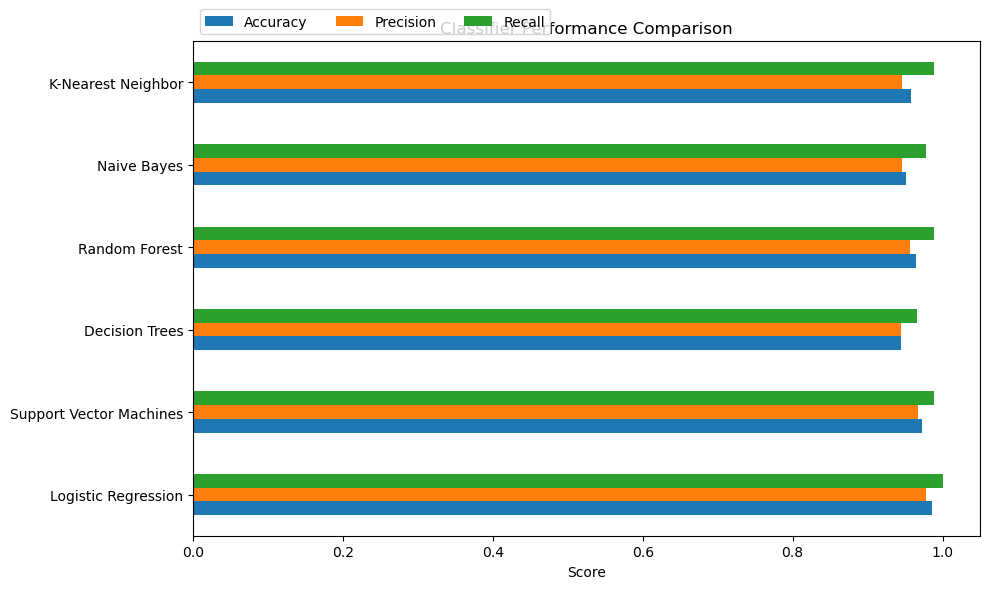

In [15]:
# Initialize a dictionary to store different classifier models
models = {}

# Add various classifier models to the dictionary
# Logistic Regression - Uses probability to predict binary outcomes
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Support Vector Machines - Finds optimal hyperplane to separate classes
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(random_state=42)

# Decision Trees - Makes predictions by learning decision rules from features
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest - Ensemble method using multiple decision trees
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(random_state=42)

# Naive Bayes - Probabilistic classifier based on Bayes' theorem
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors - Makes predictions based on closest training examples
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Initialize dictionaries to store performance metrics
accuracy, precision, recall = {}, {}, {}

# Train and evaluate each model
for key in models.keys():
    # Train the model
    models[key].fit(X_train, y_train)
    
    # Make predictions on test set
    predictions = models[key].predict(X_test)
    
    # Calculate and store performance metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions)
    recall[key] = recall_score(y_test, predictions)

# Create a DataFrame to display results in a table format
import pandas as pd
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = pd.Series(accuracy)
df_model['Precision'] = pd.Series(precision)
df_model['Recall'] = pd.Series(recall)

# Display the results table
print("\nModel Performance Comparison:")
print(df_model)

# Create a horizontal bar chart to visualize model performance
import matplotlib.pyplot as plt
ax = df_model.plot.barh(figsize=(10, 6))
plt.title('Classifier Performance Comparison')
plt.xlabel('Score')
ax.legend(
    ncol=len(df_model.columns), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()
plt.show()
